## Lab1 : Potential Function
___


### Import Dependencies

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image


### Configuration          
- **PATH_TO_IMAGE** : &nbsp; &nbsp; &nbsp; directory path to the map
- **START** : &nbsp; &nbsp; &nbsp; starting position [x,y]
- **GOAL** :  &nbsp; &nbsp; &nbsp; goal position [x,y]
- **Q**: &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; parameter of repulsive function
- **WAVEFRONT_TYPE** : 
    - "4-connectivity"
    - "8-connectivity"
    - "euclidean"
- **BUSHFIRE_TYPE** : 
     - "4-connectivity"
    - "8-connectivity"
    - "euclidean"

In [2]:
PATH_TO_IMAGE = './data/map0.png'
START = [10,10]
GOAL = [90,70]
Q = 3
WAVEFRONT_TYPE = "euclidean"
BUSHFIRE_TYPE = "euclidean"

## Wavefront Class

In [3]:
class WaveFrontAlgo():
    def __init__(self) -> None:
        pass

    def isnotOutofBound(self,index, map):
        try: #Check out of bound for exceeded index
            if index[0] < 0 or index[1] < 0 or index[0]>=map.shape[0] or index[1]>=map.shape[1]: #Check out of bound for -1 index
                return False
            else:
                return True
        except:
                return False
            
    def isValid(self,index, map):
        if self.isnotOutofBound(index,map):
            if map[index[0],index[1]] == 1: # Check Obstacle
                return False
            else: # apart from value 1 is valid
                return True
        else:
            return False
                        
    
    
    def wavefront_planner(self, map:np.array, goal:list, connection_type):
        """
        Create attraction function from Wavefront 
        """
        if connection_type == "4-connectivity":
            motions = [[-1,0],[1,0],[0,-1],[0,1]] # Up, Down, Left, Right
        else:
            motions = [[-1,0],[1,0],[0,-1],[0,1],[-1,-1],[-1,1],[1,-1],[1,1]] # Up, Down, Left, Right, Diagonals
        value = 2        
        # manually assign goal value in map 
        map[goal[0],goal[1]] = value 
        queue = [goal]

        # Start Wavefront loop 
        while queue:
            new_queue = []
            
            for p in queue:
                current_value = map[p[0],p[1]]
                for m in motions:
                    if self.isValid([p[0]+m[0],p[1]+m[1]], map):
                        if connection_type == "euclidean":
                            distance = (m[0]**2+m[1]**2)**0.5
                        else:
                            distance = 1
                        old_value = map[p[0]+m[0],p[1]+m[1]]
                        new_value = current_value + distance
                        if old_value > new_value or old_value == 0: 
                            map[p[0]+m[0],p[1]+m[1]] =  new_value
                            new_queue.append([p[0]+m[0],p[1]+m[1]])
                        
                        
                        
                    
            queue = new_queue
            #print(grid_map)

        final_map = map
        return final_map
      

                            

## BrushFire Class

In [4]:
class BrushFireAlgo():
    def __init__(self) -> None:
        pass
    
    def isnotOutofBound(self,index, map):
        try: #Check out of bound for exceeded index
            if index[0] < 0 or index[1] < 0 or index[0]>=map.shape[0] or index[1]>=map.shape[1]: #Check out of bound for -1 index
                return False
            else:
                return True
        except:
                return False
        
    def isValid(self,index, map):
        if self.isnotOutofBound(index,map):
            if map[index[0],index[1]] == 1: # Check Obstacle
                return False
            else: # apart from value 1 is valid
                return True
        else:
            return False
                        

    
    def brushfire(self, map:np.array, connection_type):
        """
        Create Brushfire function 
        """
        if connection_type == "4-connectivity":
            motions = [[-1,0],[1,0],[0,-1],[0,1]] # Up, Down, Left, Right
        else:
            motions = [[-1,0],[1,0],[0,-1],[0,1],[-1,-1],[-1,1],[1,-1],[1,1]] # Up, Down, Left, Right, Diagonals
        obstacle_value = 1
        x,y = np.where(map == obstacle_value)
        queue = []
        for i in range(len(x)-1):
            queue.append([x[i],y[i]]) 
        while queue:
            new_queue = []
            for p in queue:
                current_value = map[p[0],p[1]]
                for m in motions:
                    if self.isValid([p[0]+m[0],p[1]+m[1]],map):
                        if connection_type == "euclidean":
                            distance = (m[0]**2+m[1]**2)**0.5
                        else:
                            distance = 1
                        old_value = map[p[0]+m[0],p[1]+m[1]]
                        new_value = current_value + distance
                        if new_value < old_value or old_value ==0 :
                            map[p[0]+m[0],p[1]+m[1]] =  new_value
                            new_queue.append([p[0]+m[0],p[1]+m[1]])
                
        
            queue = new_queue

        return map
                        
    def repulsive_function(self,grid_map:np.array, q:float):
        """
        Create repulsive function with Q threshold 
        """
        for i in range(grid_map.shape[0]):
                for j in range(grid_map.shape[1]):
                    if grid_map[i,j] == 1:
                        pass
                    elif grid_map[i,j] <= q:
                        grid_map[i,j] = 4*((1/grid_map[i,j]) - (1/q))**2
                    else:
                        grid_map[i,j] = 0

                    
        return grid_map
                 

## PathFinder Class

In [5]:
class PathFinder():  
    def __init__(self) -> None:
        pass

    def isnotOutofBound(self,index, map):
        try: #Check out of bound for exceeded index
            if index[0] < 0 or index[1] < 0 or index[0]>=map.shape[0] or index[1]>=map.shape[1]: #Check out of bound for -1 index
                return False
            else:
                return True
        except:
                return False
      
        
    def find_the_path(self,map:np.array, start:list):
        #Check the neighbor 
        motions = [[-1,0],[1,0],[0,-1],[0,1],[-1,-1],[-1,1],[1,-1],[1,1]] # Up, Down, Left, Right, All Diagonals

        queue = [start[0] , start[1]]
        path = [start]
        while queue:
            new_queue = []
            current_value = map[queue[0],queue[1]]  
            
            value_list = []
            index_list = []
            for m in motions:
                neighbor_index = [queue[0]+m[0],queue[1]+m[1]] 
                
                if self.isnotOutofBound(neighbor_index, map):
                    neighbor_value = map[neighbor_index[0],neighbor_index[1]]
                    if neighbor_value < current_value:
                        value_list.append(neighbor_value)
                        index_list.append(neighbor_index)

            if index_list:
                selected_index = index_list[np.argmin(value_list)] #choose the lowest value as a path
                new_queue = selected_index
                path.append(selected_index)
                           
            queue = new_queue
        return path
    
    def find_lcoal_minimum(self,map:np.array):
        #Check the neighbor 
        motions = [[-1,0],[1,0],[0,-1],[0,1],[-1,-1],[-1,1],[1,-1],[1,1]] # Up, Down, Left, Right, All Diagonals
        local_min_list = []
        for i in range(map.shape[0]):
            for j in range(map.shape[1]):
                value = map[i, j] 
                if value < map.max() -0.00001: 
                    for m in motions:
                        is_local_min = True
                        n_index = [i+m[0],j+m[1]] 
                        if self.isnotOutofBound(n_index, map):
                            n_value = map[n_index[0],n_index[1]]
                            if n_value < map.max()-0.00001:  #not obstacle
                                if n_value < value  :
                                    is_local_min = False
                                    break
                    
                    if is_local_min:
                        local_min_list.append([i,j])

        return local_min_list                      

## Main Code

### Loading Configuration

In [6]:
image_path = PATH_TO_IMAGE
start = START
goal = GOAL

PF = PathFinder()

WF = WaveFrontAlgo()
wf_connection_type = WAVEFRONT_TYPE

BF = BrushFireAlgo()
q = Q
bf_connection_type = BUSHFIRE_TYPE

### Prepare Grid Map Data 

* Load grid map from image file

In [7]:
image = Image.open(image_path).convert('L')
grid_map = np.array(image.getdata()).reshape(image.size[0],image.size[1])/255

* Binarize the image into proper format

In [8]:
grid_map[grid_map > 0.5] = 1
grid_map[grid_map <= 0.5] = 0
# Invert colors to make 0 -> free and 1 -> occupied
grid_map = (grid_map * -1) + 1

* Show grid map 


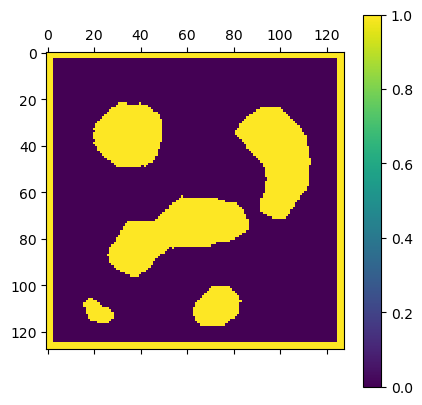

In [9]:
plt.matshow(grid_map)
plt.colorbar()
plt.show()

### Attractive Function

* find the attractive function using Wavefront Algorithm

In [10]:
attractive_fx = WF.wavefront_planner(grid_map.copy(),goal,wf_connection_type)

* normalize the data and visualization

In [11]:
attractive_fx_normalized = attractive_fx.copy()

max = attractive_fx_normalized.max() 
min = attractive_fx_normalized.min() 

attractive_fx_normalized[attractive_fx_normalized == 1]= max + 1 # Change the obstacle to the max value 
max = attractive_fx_normalized.max() 
attractive_fx_normalized= (attractive_fx_normalized- min)/ (max) # Normalize to 0.0-1.0 which obstacle is 1
        


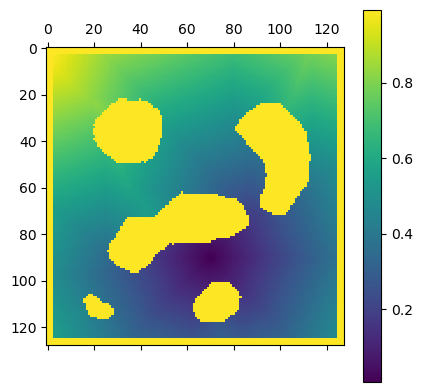

In [12]:
plt.matshow(attractive_fx_normalized)
plt.colorbar()
plt.show()

* Find the path (only attractive function)

In [13]:
path = PF.find_the_path(attractive_fx_normalized,start)    

print(path)
print("Path Distance: {}".format(len(path)))


[[10, 10], [11, 11], [12, 12], [13, 13], [14, 14], [15, 15], [16, 16], [17, 17], [18, 18], [19, 19], [20, 20], [21, 21], [21, 22], [21, 23], [21, 24], [21, 25], [21, 26], [21, 27], [21, 28], [21, 29], [21, 30], [21, 31], [21, 32], [21, 33], [21, 34], [21, 35], [21, 36], [21, 37], [21, 38], [21, 39], [21, 40], [22, 41], [22, 42], [22, 43], [23, 44], [24, 45], [25, 46], [25, 47], [26, 48], [27, 49], [28, 50], [29, 51], [30, 52], [31, 53], [32, 54], [33, 55], [34, 56], [35, 57], [36, 58], [37, 59], [38, 60], [39, 61], [40, 62], [41, 63], [42, 64], [43, 65], [44, 66], [45, 67], [46, 68], [47, 69], [48, 70], [49, 71], [50, 72], [51, 73], [52, 74], [53, 75], [54, 76], [55, 77], [56, 78], [57, 79], [58, 80], [59, 81], [60, 82], [61, 83], [62, 84], [63, 85], [64, 86], [65, 87], [66, 87], [67, 87], [68, 87], [69, 87], [70, 87], [71, 87], [72, 87], [73, 87], [74, 87], [75, 87], [76, 87], [77, 86], [78, 85], [79, 84], [80, 83], [81, 82], [82, 81], [83, 80], [84, 79], [85, 78], [86, 77], [87, 76],

- Visualize the path

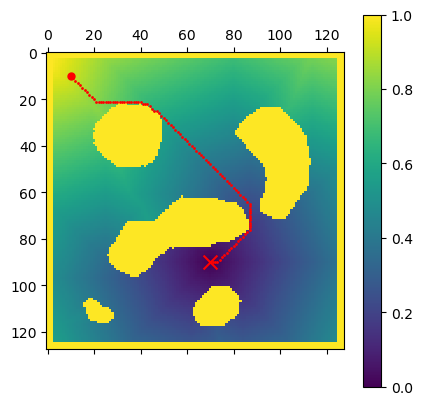

In [14]:

plt.matshow(attractive_fx_normalized)
Drawing_start_point= plt.scatter(start[1], start[0], s=100, c='red', marker='.')
Drawing_goal_point = plt.scatter(goal[1], goal[0], s=100, c='red', marker='x')

path_np = np.array(path)
x,y = path_np.T
Drawing_path = plt.scatter(y,x,s=1.0,c='red')


plt.colorbar()
plt.show()



## Repulsive Function

* Generate bushfire array from obstacle

In [15]:
bushfire_fx = BF.brushfire(grid_map.copy(),bf_connection_type)

- Visualize the Bushfire function

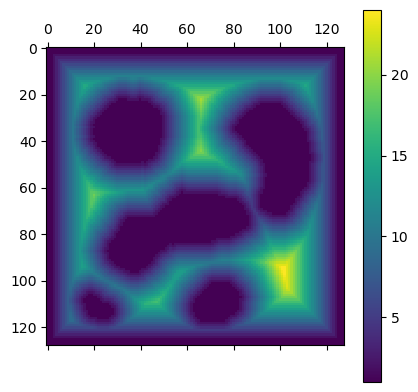

In [16]:
plt.matshow(bushfire_fx)
plt.colorbar()
plt.show()

- Generate repulsive function from bushfire array

In [17]:
repulsive_fx = BF.repulsive_function(bushfire_fx.copy(),q)

- Visualize Repulsive Function

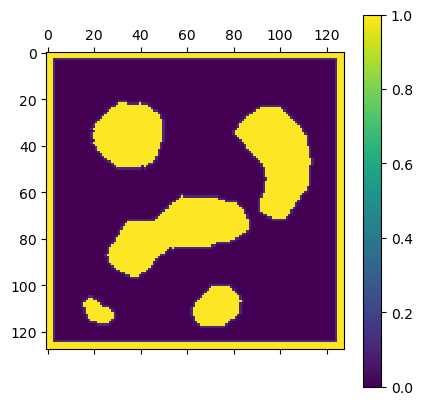

In [18]:
plt.matshow(repulsive_fx)
plt.colorbar()
plt.show()

## Attractive + Repulsive Function

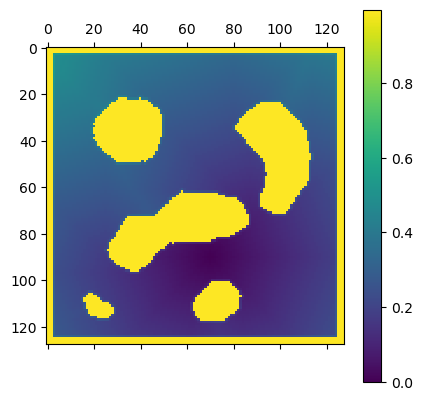

In [19]:
combined_map = attractive_fx_normalized + repulsive_fx
combined_map_normalized = combined_map.copy()
max = combined_map_normalized.max() 
min = combined_map_normalized.min()
combined_map_normalized = (combined_map_normalized - min)/ (max)
        
plt.matshow(combined_map_normalized)
plt.colorbar()
plt.show()

- find the final path of combined map

In [20]:
final_path = PF.find_the_path(combined_map_normalized,start)    


print(final_path)
print("Path Distance: {}".format(len(final_path)))

[[10, 10], [11, 11], [12, 12], [13, 13], [14, 14], [15, 15], [16, 16], [17, 17], [18, 18], [19, 19], [20, 20], [21, 21], [21, 22], [21, 23], [21, 24], [21, 25], [21, 26], [21, 27], [21, 28], [21, 29], [20, 30], [20, 31], [20, 32], [20, 33], [20, 34], [20, 35], [21, 36], [21, 37], [21, 38], [20, 39], [20, 40], [20, 41], [21, 42], [21, 43], [21, 44], [22, 45], [23, 46], [24, 47], [24, 48], [25, 49], [26, 50], [27, 51], [28, 52], [29, 53], [30, 54], [31, 55], [32, 56], [33, 57], [34, 58], [35, 59], [36, 60], [37, 61], [38, 62], [39, 63], [40, 64], [41, 65], [42, 66], [43, 67], [44, 68], [45, 69], [46, 70], [47, 71], [48, 72], [49, 73], [50, 74], [51, 75], [52, 76], [53, 77], [54, 78], [55, 79], [56, 80], [57, 81], [58, 82], [59, 83], [60, 84], [61, 85], [62, 86], [63, 87], [64, 87], [65, 87], [66, 87], [67, 87], [68, 87], [69, 87], [70, 87], [71, 88], [72, 88], [73, 88], [74, 88], [75, 88], [76, 88], [77, 88], [78, 87], [79, 86], [80, 85], [81, 84], [82, 83], [83, 82], [84, 81], [85, 80],

- Visualize the path 

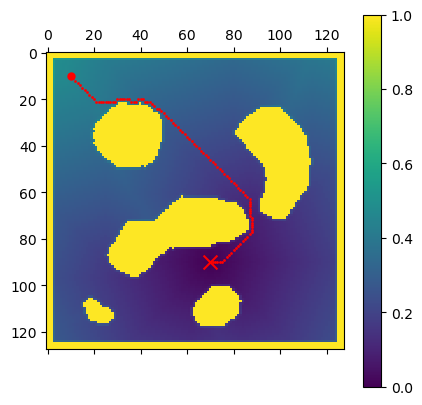

In [21]:

plt.matshow(combined_map_normalized)
Drawing_start_point= plt.scatter(start[1], start[0], s=100, c='red', marker='.')
Drawing_goal_point = plt.scatter(goal[1], goal[0], s=100, c='red', marker='x')

final_path_np = np.array(final_path)
x,y = final_path_np.T
Drawing_path = plt.scatter(y,x,s=1.0,c='red')



plt.colorbar()
plt.show()




- find local minimum (reprsent in small black dot)

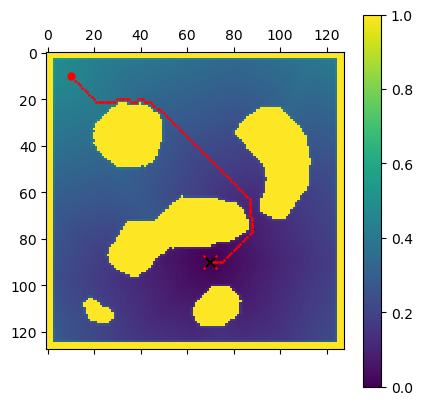

Local minimum points:[[90, 70]]


In [22]:
plt.matshow(combined_map_normalized)
Drawing_start_point= plt.scatter(start[1], start[0], s=100, c='red', marker='.')
Drawing_goal_point = plt.scatter(goal[1], goal[0], s=100, c='red', marker='x')

final_path_np = np.array(final_path)
x,y = final_path_np.T
Drawing_path = plt.scatter(y,x,s=1.0,c='red')

loc_min = PF.find_lcoal_minimum(combined_map_normalized)
local_np = np.array(loc_min)
x,y = local_np.T
Drawing_loc_min = plt.scatter(y,x,s=50,c='black',marker='x')


plt.colorbar()
plt.show()

print("Local minimum points:{}".format(loc_min))
